In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma
import random
import os

## Batch profiling processing

In [135]:
path = "profiling_results/"
filename1 = "batch_profiling_results_red_cuda_20240920_181007_ccmode.csv"
filename2 = "batch_profiling_results_red_cuda_20240924_181459_ccmode.csv"
df1 = pd.read_csv(path+filename1)
df2 = pd.read_csv(path+filename2)
df = pd.concat([df1,df2])

In [36]:
df

,model,batch_size,processing time (s),throughput (qps),cpu/interrupts/ctx_switches_count,cpu/interrupts/interrupts_count,cpu/interrupts/soft_interrupts_count,cpu/load/avg_sys_load_one_min_percent,cpu/load/avg_sys_load_five_min_percent,cpu/load/avg_sys_load_fifteen_min_percent,...,05_gpu_smi/gpu_0_bar1_total_MiB,05_gpu_smi/gpu_0_bar1_used_MiB,05_gpu_smi/gpu_0_bar1_free_MiB,05_gpu_smi/gpu_0_gpu_util_in_percent,05_gpu_smi/gpu_0_mem_util_in_percent,05_gpu_smi/gpu_0_temp_in_C,05_gpu_smi/gpu_0_clocks_throttle_reason_gpu_idle,05_gpu_smi/gpu_0_clocks_throttle_reason_applications_clocks_setting,05_gpu_smi/gpu_0_clocks_throttle_reason_sw_power_cap,05_gpu_smi/gpu_0_clocks_throttle_reason_hw_slowdown
0,granite-7b,1,1.900,0.53,25877,352776,26459,2.333333,0.583333,0.166667,...,131072.0,1.625,131070.375,86,40,30,0,0,0,0
1,granite-7b,1,1.326,0.75,26417,354956,27156,2.833333,0.666667,0.250000,...,131072.0,1.625,131070.375,84,39,30,0,0,0,0
2,granite-7b,1,1.296,0.77,27140,357402,28037,2.833333,0.666667,0.250000,...,131072.0,1.625,131070.375,84,39,31,0,0,0,0
3,granite-7b,1,1.308,0.76,27828,359585,28710,3.250000,0.833333,0.250000,...,131072.0,1.625,131070.375,86,39,31,0,0,0,0
4,granite-7b,1,1.317,0.76,28368,361723,29376,3.250000,0.833333,0.250000,...,131072.0,1.625,131070.375,85,39,31,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,llama3-8b,211,22.576,9.35,2550973,6283666,1661023,8.166667,8.166667,8.000000,...,131072.0,1.625,131070.375,85,36,47,0,0,0,0
623,llama3-8b,211,26.076,8.09,2571326,6329710,1673100,7.833333,8.083333,8.000000,...,131072.0,1.625,131070.375,79,34,46,0,0,0,0
624,llama3-8b,211,27.430,7.69,2592645,6378305,1686006,8.000000,8.083333,8.000000,...,131072.0,1.625,131070.375,69,31,46,0,0,0,0
625,llama3-8b,211,20.267,10.41,2612588,6417701,1696910,8.083333,8.166667,8.083333,...,131072.0,1.625,131070.375,26,11,47,0,0,0,0


In [137]:
grouped_df = df.groupby(['model', 'batch_size']).mean().reset_index()
grouped_df

,model,batch_size,processing time (s),throughput (qps),cpu/interrupts/ctx_switches_count,cpu/interrupts/interrupts_count,cpu/interrupts/soft_interrupts_count,cpu/load/avg_sys_load_one_min_percent,cpu/load/avg_sys_load_five_min_percent,cpu/load/avg_sys_load_fifteen_min_percent,...,05_gpu_smi/gpu_0_bar1_total_MiB,05_gpu_smi/gpu_0_bar1_used_MiB,05_gpu_smi/gpu_0_bar1_free_MiB,05_gpu_smi/gpu_0_gpu_util_in_percent,05_gpu_smi/gpu_0_mem_util_in_percent,05_gpu_smi/gpu_0_temp_in_C,05_gpu_smi/gpu_0_clocks_throttle_reason_gpu_idle,05_gpu_smi/gpu_0_clocks_throttle_reason_applications_clocks_setting,05_gpu_smi/gpu_0_clocks_throttle_reason_sw_power_cap,05_gpu_smi/gpu_0_clocks_throttle_reason_hw_slowdown
0,gemma-7b,1,1.348500,1.703500,7.661564e+05,2.137835e+06,5.137244e+05,8.366667,7.520833,5.179167,...,131072.0,1.625,131070.375,73.950000,41.150000,35.100000,0.0,0.0,0.000000,0.0
1,gemma-7b,2,1.494200,1.344000,7.734089e+05,2.162740e+06,5.216967e+05,7.220833,7.345833,5.175000,...,131072.0,1.625,131070.375,89.200000,46.900000,35.250000,0.0,0.0,0.000000,0.0
2,gemma-7b,3,1.512300,1.985000,7.826945e+05,2.190647e+06,5.311844e+05,5.662500,6.954167,5.104167,...,131072.0,1.625,131070.375,91.300000,48.550000,36.950000,0.0,0.0,0.000000,0.0
3,gemma-7b,4,1.588350,2.526500,7.943652e+05,2.221305e+06,5.418866e+05,6.387500,7.016667,5.175000,...,131072.0,1.625,131070.375,92.500000,50.100000,37.550000,0.0,0.0,0.000000,0.0
4,gemma-7b,5,1.633500,3.068500,8.082140e+05,2.255140e+06,5.540294e+05,6.483333,6.983333,5.229167,...,131072.0,1.625,131070.375,92.900000,49.550000,39.050000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,llama3-8b,136,16.846800,8.406000,3.718858e+06,8.511551e+06,2.355958e+06,8.025000,8.216667,8.308333,...,131072.0,1.625,131070.375,61.200000,31.500000,46.900000,0.0,0.0,0.000000,0.0
87,llama3-8b,149,17.732050,8.612000,2.963057e+06,7.014748e+06,1.905540e+06,8.166667,8.170833,7.970833,...,131072.0,1.625,131070.375,56.700000,29.650000,47.150000,0.0,0.0,0.000000,0.0
88,llama3-8b,167,19.740800,8.727500,3.118289e+06,7.353282e+06,1.996267e+06,8.575000,8.358333,8.100000,...,131072.0,1.625,131070.375,63.450000,33.700000,47.050000,0.0,0.0,0.000000,0.0
89,llama3-8b,191,22.415636,8.595455,2.689520e+06,6.524567e+06,1.741298e+06,8.305556,8.263889,8.013889,...,131072.0,1.625,131070.375,49.416667,25.250000,47.500000,0.0,0.0,0.083333,0.0


In [138]:
grouped_df.loc[:,"processing_time_std"] = df.groupby(['model', 'batch_size']).std().reset_index()["processing time (s)"]
grouped_df.loc[:,"throughput_std"] = df.groupby(['model', 'batch_size']).std().reset_index()["throughput (qps)"]

In [139]:
grouped_df

,model,batch_size,processing time (s),throughput (qps),cpu/interrupts/ctx_switches_count,cpu/interrupts/interrupts_count,cpu/interrupts/soft_interrupts_count,cpu/load/avg_sys_load_one_min_percent,cpu/load/avg_sys_load_five_min_percent,cpu/load/avg_sys_load_fifteen_min_percent,...,05_gpu_smi/gpu_0_bar1_free_MiB,05_gpu_smi/gpu_0_gpu_util_in_percent,05_gpu_smi/gpu_0_mem_util_in_percent,05_gpu_smi/gpu_0_temp_in_C,05_gpu_smi/gpu_0_clocks_throttle_reason_gpu_idle,05_gpu_smi/gpu_0_clocks_throttle_reason_applications_clocks_setting,05_gpu_smi/gpu_0_clocks_throttle_reason_sw_power_cap,05_gpu_smi/gpu_0_clocks_throttle_reason_hw_slowdown,processing_time_std,throughput_std
0,gemma-7b,1,1.348500,1.703500,7.661564e+05,2.137835e+06,5.137244e+05,8.366667,7.520833,5.179167,...,131070.375,73.950000,41.150000,35.100000,0.0,0.0,0.000000,0.0,0.430221,3.175921
1,gemma-7b,2,1.494200,1.344000,7.734089e+05,2.162740e+06,5.216967e+05,7.220833,7.345833,5.175000,...,131070.375,89.200000,46.900000,35.250000,0.0,0.0,0.000000,0.0,0.090037,0.101380
2,gemma-7b,3,1.512300,1.985000,7.826945e+05,2.190647e+06,5.311844e+05,5.662500,6.954167,5.104167,...,131070.375,91.300000,48.550000,36.950000,0.0,0.0,0.000000,0.0,0.037075,0.048395
3,gemma-7b,4,1.588350,2.526500,7.943652e+05,2.221305e+06,5.418866e+05,6.387500,7.016667,5.175000,...,131070.375,92.500000,50.100000,37.550000,0.0,0.0,0.000000,0.0,0.100507,0.147872
4,gemma-7b,5,1.633500,3.068500,8.082140e+05,2.255140e+06,5.540294e+05,6.483333,6.983333,5.229167,...,131070.375,92.900000,49.550000,39.050000,0.0,0.0,0.000000,0.0,0.087274,0.153667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,llama3-8b,136,16.846800,8.406000,3.718858e+06,8.511551e+06,2.355958e+06,8.025000,8.216667,8.308333,...,131070.375,61.200000,31.500000,46.900000,0.0,0.0,0.000000,0.0,3.504999,1.804797
87,llama3-8b,149,17.732050,8.612000,2.963057e+06,7.014748e+06,1.905540e+06,8.166667,8.170833,7.970833,...,131070.375,56.700000,29.650000,47.150000,0.0,0.0,0.000000,0.0,2.958995,1.334638
88,llama3-8b,167,19.740800,8.727500,3.118289e+06,7.353282e+06,1.996267e+06,8.575000,8.358333,8.100000,...,131070.375,63.450000,33.700000,47.050000,0.0,0.0,0.000000,0.0,3.519962,1.610269
89,llama3-8b,191,22.415636,8.595455,2.689520e+06,6.524567e+06,1.741298e+06,8.305556,8.263889,8.013889,...,131070.375,49.416667,25.250000,47.500000,0.0,0.0,0.083333,0.0,2.067004,0.899526


In [140]:
grouped_df.to_csv("profiling_results/batch_profiling_results_red_cuda_ccmode_grouped.csv", index=False)

In [141]:
grouped_df

,model,batch_size,processing time (s),throughput (qps),cpu/interrupts/ctx_switches_count,cpu/interrupts/interrupts_count,cpu/interrupts/soft_interrupts_count,cpu/load/avg_sys_load_one_min_percent,cpu/load/avg_sys_load_five_min_percent,cpu/load/avg_sys_load_fifteen_min_percent,...,05_gpu_smi/gpu_0_bar1_free_MiB,05_gpu_smi/gpu_0_gpu_util_in_percent,05_gpu_smi/gpu_0_mem_util_in_percent,05_gpu_smi/gpu_0_temp_in_C,05_gpu_smi/gpu_0_clocks_throttle_reason_gpu_idle,05_gpu_smi/gpu_0_clocks_throttle_reason_applications_clocks_setting,05_gpu_smi/gpu_0_clocks_throttle_reason_sw_power_cap,05_gpu_smi/gpu_0_clocks_throttle_reason_hw_slowdown,processing_time_std,throughput_std
0,gemma-7b,1,1.348500,1.703500,7.661564e+05,2.137835e+06,5.137244e+05,8.366667,7.520833,5.179167,...,131070.375,73.950000,41.150000,35.100000,0.0,0.0,0.000000,0.0,0.430221,3.175921
1,gemma-7b,2,1.494200,1.344000,7.734089e+05,2.162740e+06,5.216967e+05,7.220833,7.345833,5.175000,...,131070.375,89.200000,46.900000,35.250000,0.0,0.0,0.000000,0.0,0.090037,0.101380
2,gemma-7b,3,1.512300,1.985000,7.826945e+05,2.190647e+06,5.311844e+05,5.662500,6.954167,5.104167,...,131070.375,91.300000,48.550000,36.950000,0.0,0.0,0.000000,0.0,0.037075,0.048395
3,gemma-7b,4,1.588350,2.526500,7.943652e+05,2.221305e+06,5.418866e+05,6.387500,7.016667,5.175000,...,131070.375,92.500000,50.100000,37.550000,0.0,0.0,0.000000,0.0,0.100507,0.147872
4,gemma-7b,5,1.633500,3.068500,8.082140e+05,2.255140e+06,5.540294e+05,6.483333,6.983333,5.229167,...,131070.375,92.900000,49.550000,39.050000,0.0,0.0,0.000000,0.0,0.087274,0.153667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,llama3-8b,136,16.846800,8.406000,3.718858e+06,8.511551e+06,2.355958e+06,8.025000,8.216667,8.308333,...,131070.375,61.200000,31.500000,46.900000,0.0,0.0,0.000000,0.0,3.504999,1.804797
87,llama3-8b,149,17.732050,8.612000,2.963057e+06,7.014748e+06,1.905540e+06,8.166667,8.170833,7.970833,...,131070.375,56.700000,29.650000,47.150000,0.0,0.0,0.000000,0.0,2.958995,1.334638
88,llama3-8b,167,19.740800,8.727500,3.118289e+06,7.353282e+06,1.996267e+06,8.575000,8.358333,8.100000,...,131070.375,63.450000,33.700000,47.050000,0.0,0.0,0.000000,0.0,3.519962,1.610269
89,llama3-8b,191,22.415636,8.595455,2.689520e+06,6.524567e+06,1.741298e+06,8.305556,8.263889,8.013889,...,131070.375,49.416667,25.250000,47.500000,0.0,0.0,0.083333,0.0,2.067004,0.899526


In [142]:
for model in ["gemma-7b", "granite-7b", "llama3-8b"]: 
    print(grouped_df.loc[grouped_df[grouped_df["model"] == model]["throughput (qps)"].idxmax()][["model", "batch_size", "throughput (qps)"]])
    print()

model               gemma-7b
batch_size                64
throughput (qps)      10.451
Name: 20, dtype: object

model               granite-7b
batch_size                  89
throughput (qps)        10.384
Name: 51, dtype: object

model               llama3-8b
batch_size                 64
throughput (qps)       10.136
Name: 72, dtype: object



## Batch Size Profiling Plots

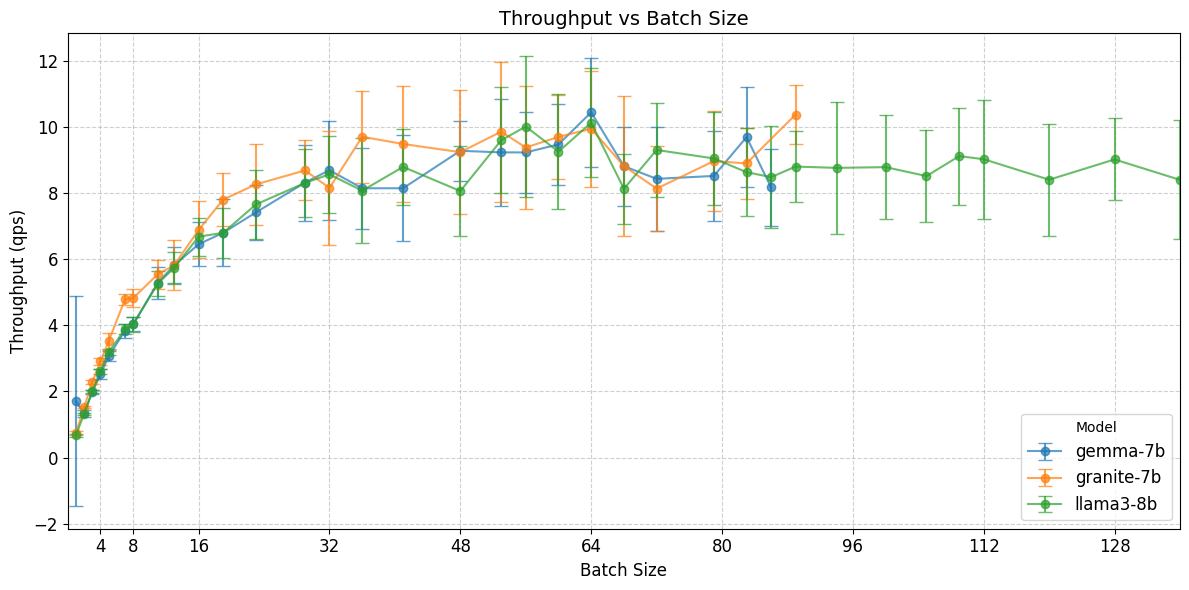

In [381]:
fig, ax = plt.subplots(figsize = (12,6), nrows=1, ncols=1)

grouped = grouped_df.groupby('model')

# Plot for each model
for model, group in grouped:
    ax.errorbar(group['batch_size'], group['throughput (qps)'], yerr=group['throughput_std'], 
                 label=model, fmt='-o', capsize=5, alpha = 0.7)

# Set plot labels and title
ax.set_xlabel('Batch Size', fontsize = 12)
ax.set_ylabel('Throughput (qps)', fontsize = 12)
ax.set_title('Throughput vs Batch Size', fontsize = 14)
ax.legend(title='Model', loc="lower right", fontsize = 12)
ax.grid(linestyle = "--", alpha = 0.6)
ax.set_xlim(0,136)
ax.set_xticks(list(set([2**i for i in range(2,8)] + [16*i for i in range(3,8)])))
ax.tick_params(axis='both', which='major', labelsize=12)

fig.tight_layout()
fig.savefig('readme_media/throughput_vs_batch_size.png', dpi=300)


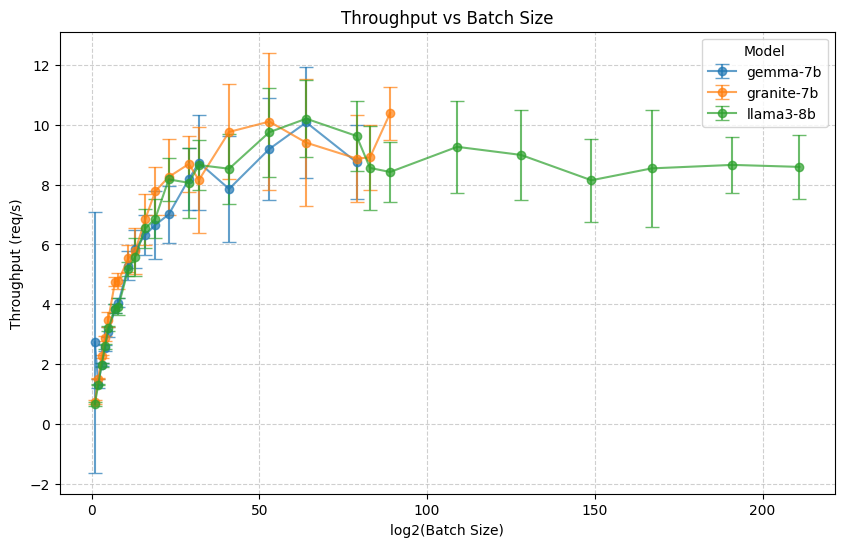

In [43]:
plt.figure(figsize=(10, 6))

# Group data by model alias
grouped = grouped_df.groupby('model')


# Set plot labels and title
plt.xlabel('log2(Batch Size)')
plt.ylabel('Throughput (req/s)')
plt.title('Throughput vs Batch Size')
plt.legend(title='Model')
plt.grid(linestyle = "--", alpha = 0.6)

# Show the plot
plt.show()

## Input Patterns

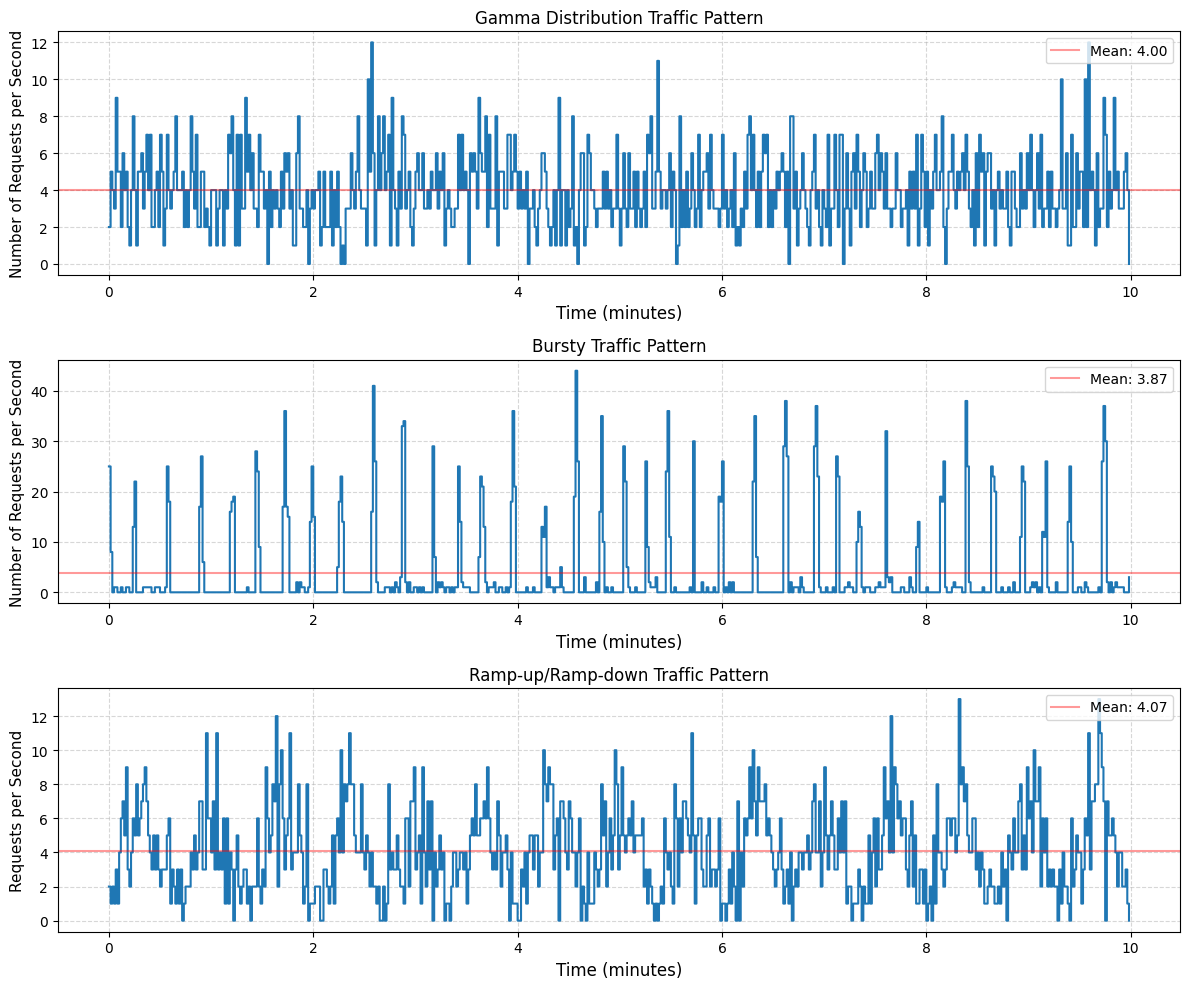

In [386]:
fig, ax = plt.subplots(figsize=(12, 10), nrows=3, ncols=1, sharey=False)

np.random.seed(42)
random.seed(42)

# Plot 1: Gamma Distribution Traffic Pattern
run_duration = 10 * 60  # Total time in seconds (e.g., 10 minutes)
rate = 4                # Average rate (requests per second)
shape = 1.0             # Shape parameter (alpha)
scale = 1 / rate        # Scale parameter (theta)

# Create time bins (e.g., per second)
time_bins = np.arange(0, run_duration + 1)
# Convert time bins to minutes for the x-axis
time_bins_minutes = time_bins / 60

# Generate inter-arrival times using Gamma distribution
inter_arrival_times = np.random.gamma(shape, scale, size=int(run_duration * rate))
arrival_times = np.cumsum(inter_arrival_times)
arrival_times = arrival_times[arrival_times <= run_duration]
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Plot Gamma Distribution
gamma_mean = np.mean(request_counts)
ax[0].step(time_bins_minutes[:-1], request_counts, where='post')
ax[0].axhline(gamma_mean, color='r', linestyle='-', label=f'Mean: {gamma_mean:.2f}', alpha = 0.4)
ax[0].set_title('Gamma Distribution Traffic Pattern')
ax[0].set_xlabel('Time (minutes)', fontsize = 12)
ax[0].set_ylabel('Number of Requests per Second', fontsize = 11)
ax[0].grid(True, linestyle="--", alpha=0.5)
ax[0].legend(loc="upper right")
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot 2: Bursty Traffic Pattern (Updated)
arrival_times = []
current_time = 0
while current_time < run_duration:
    burst_duration = np.random.uniform(1, 3)
    burst_rate = np.random.uniform(20, 35)
    num_requests = int(burst_duration * burst_rate)
    inter_arrival_times = np.random.exponential(1 / burst_rate, size=num_requests) 
    if inter_arrival_times.size > 0:
        cumulative_times = current_time + np.cumsum(inter_arrival_times)
        arrival_times.extend(cumulative_times[cumulative_times <= current_time + burst_duration])
    current_time += burst_duration   
    idle_duration = np.random.uniform(10, 18)
    idle_rate = np.random.uniform(0, 1)
    num_requests = int(idle_duration * idle_rate)
    inter_arrival_times = np.random.exponential(1 / idle_rate, size=num_requests) if idle_rate > 0 else []
    if inter_arrival_times.size > 0:
        cumulative_times = current_time + np.cumsum(inter_arrival_times)
        arrival_times.extend(cumulative_times[cumulative_times <= current_time + idle_duration])   
    current_time += idle_duration
arrival_times = np.array(arrival_times)
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Plot Bursty Traffic
bursty_mean = np.mean(request_counts)
ax[1].step(time_bins_minutes[:-1], request_counts, where='post')
ax[1].axhline(bursty_mean, color='r', linestyle='-', label=f'Mean: {bursty_mean:.2f}', alpha = 0.4)
ax[1].set_title('Bursty Traffic Pattern')
ax[1].set_xlabel('Time (minutes)', fontsize = 12)
ax[1].set_ylabel('Number of Requests per Second', fontsize = 11)
ax[1].grid(True, linestyle="--", alpha=0.5)
ax[1].legend(loc="upper right")
ax[1].tick_params(axis='both', which='major', labelsize=10)


# Plot 3: Repeating Ramp-up/Ramp-down Traffic Pattern
min_rate = 1
max_rate = 7
ramp_up_duration = 20
ramp_down_duration = 20
cycle_duration = ramp_up_duration + ramp_down_duration
arrival_times = []
current_time = 0
while current_time < run_duration:
    time_in_cycle = (current_time % cycle_duration)
    if time_in_cycle < ramp_up_duration:
        current_rate = min_rate + (max_rate - min_rate) * (time_in_cycle / ramp_up_duration)
    else:
        time_in_ramp_down = time_in_cycle - ramp_up_duration
        current_rate = max_rate - (max_rate - min_rate) * (time_in_ramp_down / ramp_down_duration) 
    inter_arrival_time = np.random.exponential(1 / current_rate)
    current_time += inter_arrival_time
    if current_time <= run_duration:
        arrival_times.append(current_time)
arrival_times = np.array(arrival_times)
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Plot Ramp-up/Ramp-down Traffic
ramp_mean = np.mean(request_counts)
ax[2].step(time_bins_minutes[:-1], request_counts, where='post')
ax[2].axhline(ramp_mean, color='r', linestyle='-', label=f'Mean: {ramp_mean:.2f}', alpha = 0.4)
ax[2].set_title('Ramp-up/Ramp-down Traffic Pattern')
ax[2].set_xlabel('Time (minutes)', fontsize = 12)
ax[2].set_ylabel('Requests per Second', fontsize = 11)
ax[2].grid(True, linestyle="--", alpha=0.5)
ax[2].legend(loc="upper right")
ax[2].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('readme_media/input_patterns.png', dpi=300)
plt.show()


## Results analysis

In [247]:
folder_path = 'outputs'

# Create a dictionary to store dataframes with file names as keys
dataframes = {}

# Iterate through each file in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Store the DataFrame in the dictionary using the filename (without .csv) as the key
        dataframes[filename[:-4]] = df

# Now each CSV is loaded into the 'dataframes' dictionary
# You can access each dataframe using the filename (without .csv) as the key


In [251]:
list(dataframes.keys())

['measurements_results_red_cuda_BestBatch+Timer_bursty_mean4_1200_sla60_20240926_200817',
 'measurements_results_red_cuda_SelectBatch+Timer_bursty_mean8_1200_sla60_20240927_004538',
 'measurements_results_red_cuda_BestBatch+Timer_ramp_mean8_1200_sla60_20240927_014939',
 'measurements_results_red_cuda_BestBatch+PartialBatch+Timer_ramp_mean8_1200_sla60_20240927_023219',
 'measurements_results_red_cuda_BestBatch+PartialBatch+Timer_gamma_mean8_1200_sla60_20240926_234138',
 'measurements_results_red_cuda_BestBatch+Timer_bursty_mean8_1200_sla60_20240927_002418',
 'measurements_results_red_cuda_BestBatch+PartialBatch+Timer_bursty_mean4_1200_sla60_20240926_205057',
 'measurements_results_red_cuda_BestBatch+PartialBatch+Timer_bursty_mean8_1200_sla60_20240927_010658',
 'measurements_results_red_cuda_SelectBatch+Timer_ramp_mean8_1200_sla60_20240927_021059',
 'measurements_results_red_cuda_BestBatch+PartialBatch+Timer_gamma_mean4_1200_sla60_20240926_192536',
 'measurements_results_red_cuda_SelectB

In [304]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# Folder containing the CSV files
folder_path = 'outputs'

# Function to parse filename and extract relevant information
def parse_filename(filename):
    # Modify the regex pattern to allow for multiple '+' signs in the strategy
    pattern = re.compile(r".*_(\w+)_([A-Za-z]+)_([A-Za-z\+\+]+)_(ramp|bursty|gamma)_mean(\d+)_\d+_sla(\d+)_\d+_\d+")
    match = pattern.match(filename)
    
    if match:
        machine = match.group(1)
        device = match.group(2)
        strategy = match.group(3)  # Strategy may contain multiple '+' signs
        pattern_type = match.group(4)
        input_mean = int(match.group(5))
        time_limit = int(match.group(6))
        # print(machine)
        # print(device)
        # print(strategy)
        # print(pattern_type)
        # print(input_mean)
        # print(time_limit)
        return machine, device, strategy, pattern_type, input_mean, time_limit
    else:
        return None

# Dictionary to store the dataframes
dataframes = {}

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Parse the filename to extract input mean and time limit
        info = parse_filename(filename)
        
        if info:
            machine, device, strategy, pattern_type, input_mean, time_limit = info
            # Read the CSV file
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            
            # Add the filename metadata as columns to the dataframe
            df['machine'] = machine
            df['device'] = device
            df['strategy'] = strategy
            df['pattern'] = pattern_type
            df['input_mean'] = input_mean
            df['time_limit'] = time_limit
            
            # Store the dataframe in the dictionary
            dataframes[filename[:-4]] = df
 

In [355]:
import os
import re
import pandas as pd

# Folder paths for the CSVs and log files
csv_folder = 'outputs'
log_folder = 'logs'

# Function to parse the log file and extract the relevant information
def extract_log_info(log_file_path):
    switch_count = None
    total_time = None
    total_inference_time = None
    inference_percentage = None
    
    with open(log_file_path, 'r') as file:
        lines = file.readlines()
        
        end_found = False
        for i in range(len(lines) - 1, -1, -1):
            line = lines[i].strip()
            #print(f"Processing line: {line}")  # Print the current line for debugging
            
            # Check if we found "END", start reading the lines we need after this
            if "END" in line and not end_found:
                #print("END FOUND, start reading times and switch count")
                end_found = True
                continue
            
            if end_found:
                # Check for SWITCH COUNT
                if "SWITCH COUNT" in line and switch_count is None:
                    #print("SWITCH COUNT FOUND")
                    match = re.search(r'SWITCH COUNT: (\d+)', line)
                    if match:
                        switch_count = int(match.group(1))
                        #print(f"Switch count: {switch_count}")
                
                # Check for Total time
                elif "Total time" in line and total_time is None:
                    #print("TOTAL TIME FOUND")
                    match = re.search(r'Total time:\s*([\d\.]+)\s*seconds', line)
                    if match:
                        total_time = float(match.group(1))
                        #print(f"Total time: {total_time}")
                
                # Check for Total inference time
                elif "Total inference time" in line and total_inference_time is None:
                    #print("TOTAL INFERENCE TIME FOUND")
                    match = re.search(r'Total inference time:\s*([\d\.]+)\s*seconds', line)
                    if match:
                        total_inference_time = float(match.group(1))
                        #print(f"Total inference time: {total_inference_time}")
                
                # Check for Inference percentage
                elif "Inference time as percentage of total time" in line and inference_percentage is None:
                    #print("INFERENCE PERCENTAGE FOUND")
                    match = re.search(r'Inference time as percentage of total time:\s*([\d\.]+)%', line)
                    if match:
                        inference_percentage = float(match.group(1))
                        #print(f"Inference time percentage: {inference_percentage}")

                # After reading all required fields, we can stop
                if switch_count is not None and total_time is not None and total_inference_time is not None and inference_percentage is not None:
                    #print("All required data found, stopping.")
                    break

    return switch_count, total_time, total_inference_time, inference_percentage

# Dictionary to store dataframes
dataframes = {}

# Iterate over each CSV file in the folder
for filename in os.listdir(csv_folder):
    if filename.endswith('.csv'):
        # Parse the CSV file
        file_path = os.path.join(csv_folder, filename)
        df = pd.read_csv(file_path)
        
        # Parse machine, device, strategy, pattern, input mean, and time limit from the filename
        # (Here, you would have the same parsing logic as before for the filename)
        machine, device, strategy, pattern_type, input_mean, time_limit = parse_filename(filename)

        # Add the filename metadata to the dataframe
        df['machine'] = machine
        df['device'] = device
        df['strategy'] = strategy
        df['pattern'] = pattern_type
        df['input_mean'] = input_mean
        df['time_limit'] = time_limit

        # Modify the log filename by replacing the prefix
        csv_prefix = 'measurements_results_'
        log_prefix = 'batch_processing_debug_'

        # Construct the corresponding log file path by replacing the prefix and extension
        log_file_path = os.path.join(log_folder, filename.replace(csv_prefix, log_prefix).replace('.csv', '.log'))

        # Check if the corresponding log file exists
        if os.path.exists(log_file_path):
            #print("LOG FOUND")
            # Extract log data from the log file
            switch_count, total_time, total_inference_time, inference_percentage = extract_log_info(log_file_path)

            # Add the extracted log information to the dataframe
            df['switch_count'] = switch_count
            df['total_time'] = total_time
            df['total_inference_time'] = total_inference_time
            df['inference_percentage'] = inference_percentage
            df["overall_throughput"] = df.shape[0]/total_time
            df["inference throughput"] = df.shape[0]/total_inference_time
            df["SLO attainment"] = round(sum(df["latency (s)"]<time_limit)/df.shape[0]*100,2)
        
        # Store the dataframe in the dictionary using the filename as key
        dataframes[filename[:-4]] = df

# Combine all dataframes into a single one for easier analysis
combined_df = pd.concat(dataframes.values())

# Now 'combined_df' contains all the data from CSVs and logs together


In [354]:
round(sum(df["latency (s)"]<time_limit)/df.shape[0]*100,2)

83.35

In [356]:
combined_df

,request_id,arrival time,timestamp,model,batch_size,latency (s),processing time (s),throughput (qps),cpu/interrupts/ctx_switches_count,cpu/interrupts/interrupts_count,...,pattern,input_mean,time_limit,switch_count,total_time,total_inference_time,inference_percentage,overall_throughput,inference throughput,SLO attainment
0,c61da18e,2024-09-26 20:08:35,2024-09-26 20:09:31,gemma-7b,42,56.604,6.443,6.519,30438,251876,...,bursty,4,60,41,1185.8231,261.688,22.07,2.094748,9.492220,40.14
1,6df427fd,2024-09-26 20:08:35,2024-09-26 20:09:31,gemma-7b,42,56.367,6.443,6.519,30438,251876,...,bursty,4,60,41,1185.8231,261.688,22.07,2.094748,9.492220,40.14
2,ecf73283,2024-09-26 20:08:35,2024-09-26 20:09:31,gemma-7b,42,56.361,6.443,6.519,30438,251876,...,bursty,4,60,41,1185.8231,261.688,22.07,2.094748,9.492220,40.14
3,72b0b862,2024-09-26 20:08:35,2024-09-26 20:09:31,gemma-7b,42,56.317,6.443,6.519,30438,251876,...,bursty,4,60,41,1185.8231,261.688,22.07,2.094748,9.492220,40.14
4,259de958,2024-09-26 20:08:35,2024-09-26 20:09:31,gemma-7b,42,56.248,6.443,6.519,30438,251876,...,bursty,4,60,41,1185.8231,261.688,22.07,2.094748,9.492220,40.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,ca46fc59,2024-09-27 01:48:28,2024-09-27 01:49:07,llama3-8b,64,38.639,5.600,11.429,1074234,7142531,...,ramp,8,60,43,1181.4563,363.741,30.79,2.938746,9.545253,83.35
3468,de452233,2024-09-27 01:48:28,2024-09-27 01:49:07,llama3-8b,64,38.358,5.600,11.429,1074234,7142531,...,ramp,8,60,43,1181.4563,363.741,30.79,2.938746,9.545253,83.35
3469,111d4451,2024-09-27 01:48:29,2024-09-27 01:49:07,llama3-8b,64,37.886,5.600,11.429,1074234,7142531,...,ramp,8,60,43,1181.4563,363.741,30.79,2.938746,9.545253,83.35
3470,d56b1b1e,2024-09-27 01:48:29,2024-09-27 01:49:07,llama3-8b,64,37.831,5.600,11.429,1074234,7142531,...,ramp,8,60,43,1181.4563,363.741,30.79,2.938746,9.545253,83.35


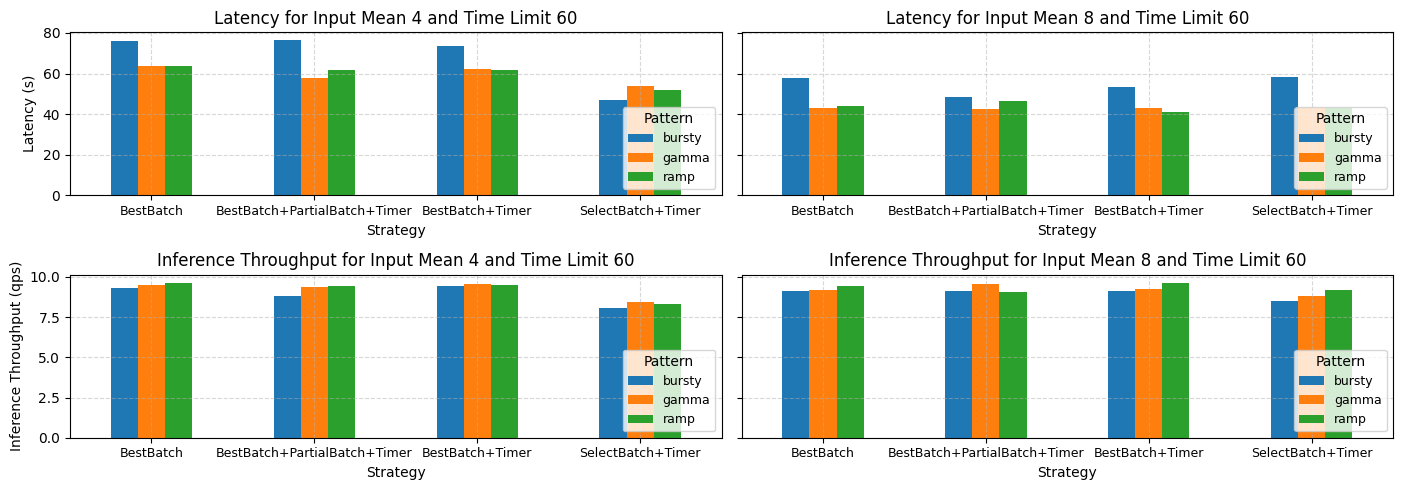

In [340]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(14, 5), nrows=2, ncols=2, sharey='row')  # Adjust height to fit two rows

# Create plots for each combination of input mean and time limit
for i, ((input_mean, time_limit), group) in enumerate(combined_df.groupby(['input_mean', 'time_limit'])):
    
    row = i // 2  # Determine the row index (either 0 or 1)
    col = i % 2   # Determine the column index (either 0 or 1)
    
    # Pivot the data to have strategies and patterns side by side for Latency
    latency_pivot_data = group.pivot_table(values='latency (s)', index='strategy', columns='pattern', aggfunc='mean')  
    # Create the grouped bar plot for Latency
    latency_pivot_data.plot(kind='bar', ax=ax[0, col], legend=True)
    ax[0, col].set_title(f'Latency for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[0, col].set_xlabel('Strategy')
    ax[0, col].set_ylabel('Latency (s)')
    ax[0, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[0, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[0, col].grid(alpha=0.5, linestyle="--")

    # Pivot the data to have strategies and patterns side by side for Throughput
    throughput_pivot_data = group.pivot_table(values='throughput (qps)', index='strategy', columns='pattern', aggfunc='mean')  
    # Create the grouped bar plot for Throughput
    throughput_pivot_data.plot(kind='bar', ax=ax[1, col], legend=True)
    ax[1, col].set_title(f'Inference Throughput for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[1, col].set_xlabel('Strategy')
    ax[1, col].set_ylabel('Inference Throughput (qps)')
    ax[1, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[1, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[1, col].grid(alpha=0.5, linestyle="--")

    # Break if more plots than available subplots
    if i >= 3:  # We only have space for 2 rows x 2 columns
        break

fig.tight_layout()
plt.show()


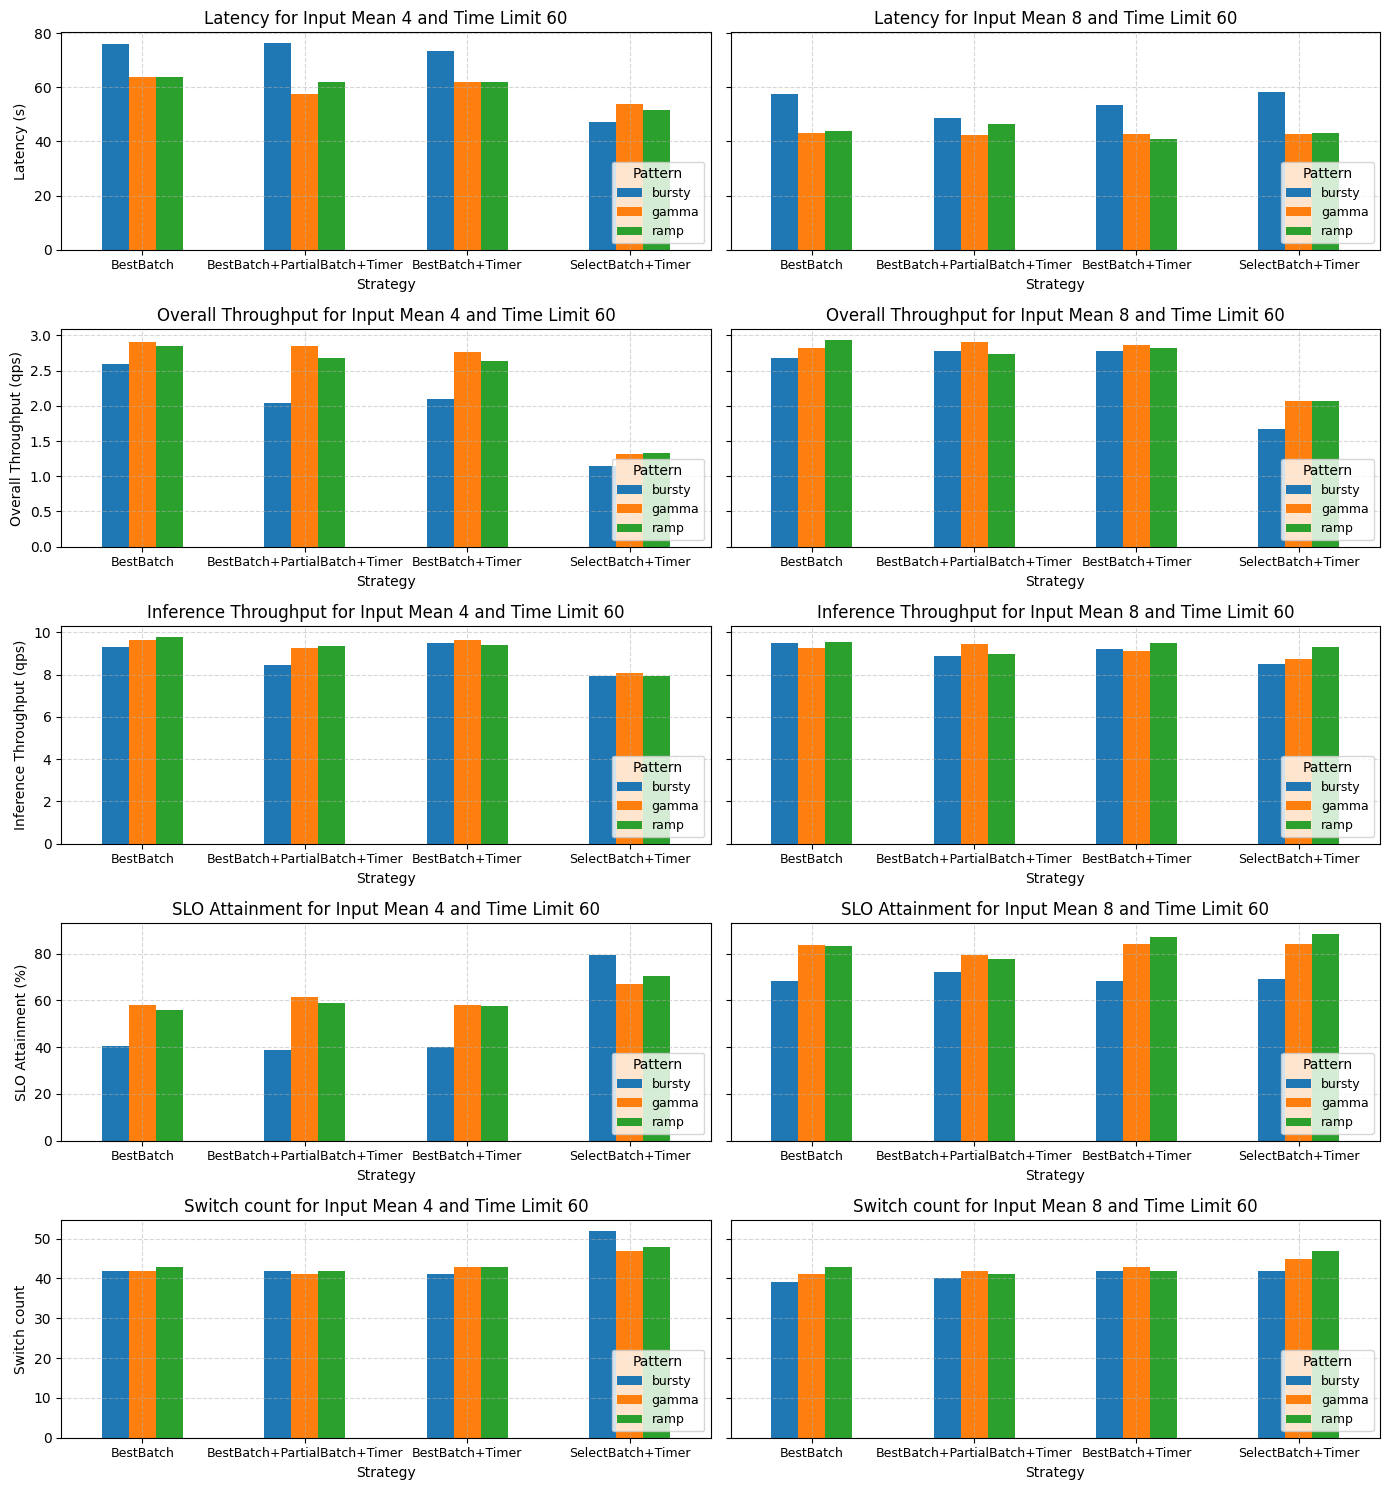

In [364]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 5 rows and 2 columns
fig, ax = plt.subplots(figsize=(14, 15), nrows=5, ncols=2, sharey='row') 

# Create plots for each combination of input mean and time limit
for i, ((input_mean, time_limit), group) in enumerate(combined_df.groupby(['input_mean', 'time_limit'])):
    
    col = i % 2   # Determine the column index (either 0 or 1)
    
    # Pivot the data to have strategies and patterns side by side for Latency
    latency_pivot_data = group.pivot_table(values='latency (s)', index='strategy', columns='pattern', aggfunc='mean')
    latency_pivot_data.plot(kind='bar', ax=ax[0, col], legend=True)
    ax[0, col].set_title(f'Latency for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[0, col].set_xlabel('Strategy')
    ax[0, col].set_ylabel('Latency (s)')
    ax[0, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[0, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[0, col].grid(alpha=0.5, linestyle="--")

    # Plot overall throughput
    overall_throughput_pivot_data = group.pivot_table(values='overall_throughput', index='strategy', columns='pattern', aggfunc='mean')
    overall_throughput_pivot_data.plot(kind='bar', ax=ax[1, col], legend=True)
    ax[1, col].set_title(f'Overall Throughput for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[1, col].set_xlabel('Strategy')
    ax[1, col].set_ylabel('Overall Throughput (qps)')
    ax[1, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[1, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[1, col].grid(alpha=0.5, linestyle="--")

    # Plot inference throughput
    inference_throughput_pivot_data = group.pivot_table(values='inference throughput', index='strategy', columns='pattern', aggfunc='mean')
    inference_throughput_pivot_data.plot(kind='bar', ax=ax[2, col], legend=True)
    ax[2, col].set_title(f'Inference Throughput for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[2, col].set_xlabel('Strategy')
    ax[2, col].set_ylabel('Inference Throughput (qps)')
    ax[2, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[2, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[2, col].grid(alpha=0.5, linestyle="--")
    
    # Plot SLO attainment
    slo_attainment_pivot_data = group.pivot_table(values='SLO attainment', index='strategy', columns='pattern', aggfunc='mean')
    slo_attainment_pivot_data.plot(kind='bar', ax=ax[3, col], legend=True)
    ax[3, col].set_title(f'SLO Attainment for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[3, col].set_xlabel('Strategy')
    ax[3, col].set_ylabel('SLO Attainment (%)')
    ax[3, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[3, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[3, col].grid(alpha=0.5, linestyle="--")
    
    # Plot SLO attainment
    switch_count_pivot_data = group.pivot_table(values='switch_count', index='strategy', columns='pattern', aggfunc='mean')
    switch_count_pivot_data.plot(kind='bar', ax=ax[4, col], legend=True)
    ax[4, col].set_title(f'Switch count for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[4, col].set_xlabel('Strategy')
    ax[4, col].set_ylabel('Switch count')
    ax[4, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[4, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[4, col].grid(alpha=0.5, linestyle="--")
    # Stop if more than the number of available subplots
    if i >= 9:  # We only have space for 5 rows x 2 columns
        break

fig.tight_layout()
plt.show()


In [239]:
path = "outputs/"
df_trafficmean2 = pd.read_csv(path+"measurements_results_red_cuda_SelectBatch+Timer_bursty_1200_mean4_20240926_122211.csv")
df_trafficmean5 = pd.read_csv(path+"measurements_results_red_cuda_SelectBatch+Timer_bursty_mean4_1200_20240926_131538.csv")
df_trafficmean8 = pd.read_csv(path+"measurements_results_red_cuda_SelectBatch+Timer_bursty_mean4_1200_20240926_140821.csv")

In [233]:
path = "outputs/"
df_trafficmean2 = pd.read_csv(path+"measurements_results_red_cuda_BestBatch+PartialBatch_bursty_900_20240925_133549.csv")
df_trafficmean5 = pd.read_csv(path+"measurements_results_red_cuda_BestBatch+PartialBatch_bursty_900_20240925_135210.csv")
df_trafficmean8 = pd.read_csv(path+"measurements_results_red_cuda_BestBatch+PartialBatch_bursty_900_20240925_140830.csv")

In [244]:
pd.DataFrame({'traffic mean req per sec': [2,5,8],
               'mean latency': [df_trafficmean2["latency (s)"].mean(), df_trafficmean5["latency (s)"].mean(), df_trafficmean8["latency (s)"].mean()],
               'throughput': [df_trafficmean2["throughput (qps)"].mean(), df_trafficmean5["throughput (qps)"].mean(), df_trafficmean8["throughput (qps)"].mean()],
               'overall throughput': [df_trafficmean2.shape[0]/1200, df_trafficmean5.shape[0]/1200, df_trafficmean8.shape[0]/1200],
               'processing time': [df_trafficmean2["processing time (s)"].mean(), df_trafficmean5["processing time (s)"].mean(), df_trafficmean8["processing time (s)"].mean()]
               })

,traffic mean req per sec,mean latency,throughput,overall throughput,processing time
0,2,47.691767,7.871960,1.033333,3.834203
1,5,51.622088,8.269095,1.122500,4.519139
2,8,45.044730,7.497538,1.125000,4.665184


In [242]:
df_trafficmean5["latency (s)"].mean()

np.float64(51.622087602078686)

In [235]:
# Read the CSV file without headers
df = pd.read_csv('gpu_utilization/gpu_usage_20240926_131556.csv', header=None, names=['Timestamp', 'Value'])
# Remove '%' and convert to float
df['Value'] = df['Value'].str.replace('%', '').astype(float)
# Calculate the mean
mean_value = df['Value'].mean()
print(f"GPU utilization: {mean_value}")

GPU utilization: 19.08153078202995
